<a href="https://colab.research.google.com/github/RenatodaCostaSantos/Machine-Learning---Lessons/blob/main/Supervised%20ML/Decision%20trees%20and%20random%20forests/Lesson_2_Decision_trees_with_Sci_Kit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building decision trees with sci-kit-learn

In the previous lesson, we learned about the nomenclature associated with each part of a decision tree and how it optimally performs splits of the data. We used a very small dataset containing only ten observations and performed the calculations step by step for only one node. The amount of work was huge but the iterations are repetitive and can be automated. We already did it when we built some functions to compute, for example, the optimal thresholds. Sci-kit-learn is a library containing many functions that automate most calculations for us. Now that we know how it performs under the hood, we can use it to build decision trees in a much more efficient way.

We will build decision trees to try to predict the final grade for students, given some features for each student. The [Student Performance dataset](https://archive.ics.uci.edu/ml/datasets/student+performance) can be found at the UCI machine learning repository website.

For this lesson, we will use the following features:

- absences: number of school absences (numeric: from 0 to 93)

- health: current health status (ordinal: ["Very Bad", "Bad", "Regular", "Good", "Very Good"])

- sex: student's sex (binary: 'F' — female, or 'M' — male)

- internet: internet access at home (binary: "yes" or "no")

- Mjob: mother's job (categorical: "teacher," "health" care-related, civil "services" (e.g., administrative or police), "at_home," or "other")

- Fjob: father's job (categorical: "teacher," "health" care-related, civil "services" (e.g., administrative or police), "at_home," or "other")

- guardian: student's guardian (categorical: "mother," "father," or "other")

- Pstatus: parent's cohabitation status (binary: "T" — living together or "A" — apart)

- famrel: quality of family relationships (ordinal: "Very Bad", "Bad", "Regular", "Good", or "Excellent")

Some of the features are categorical and will need to be transformed. The target column "G3" is numerical, making it suitable for regression trees. Later on, we will also perform transformations in the target variable to train and build a classification tree.

Let's import and read the dataset:




In [ ]:
import pandas as pd

from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Read dataset
grades = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Decision trees/student-por.csv', sep = ';')

In [ ]:
grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,Good,3,4,1,1,Regular,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,Excellent,3,3,1,1,Regular,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,Good,3,2,2,3,Regular,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,Regular,2,2,1,1,Very Good,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,Good,3,2,1,2,Very Good,0,11,13,13


In [ ]:
# Select just the features of interest
grades = grades[['absences', 'health', 'sex', 'internet', 'Mjob', 'Fjob', 'guardian', 'Pstatus', 'famrel', 'G3']]

In [ ]:
grades.head()

,absences,health,sex,internet,Mjob,Fjob,guardian,Pstatus,famrel,G3
0,4,Regular,F,no,at_home,teacher,mother,A,Good,11
1,2,Regular,F,yes,at_home,other,father,T,Excellent,11
2,6,Regular,F,yes,at_home,other,mother,T,Good,12
3,0,Very Good,F,yes,health,services,mother,T,Regular,14
4,0,Very Good,F,no,other,other,father,T,Good,13


In [ ]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   absences  649 non-null    int64 
 1   health    649 non-null    object
 2   sex       649 non-null    object
 3   internet  649 non-null    object
 4   Mjob      649 non-null    object
 5   Fjob      649 non-null    object
 6   guardian  649 non-null    object
 7   Pstatus   649 non-null    object
 8   famrel    649 non-null    object
 9   G3        649 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 50.8+ KB


# Preparing the data for machine learning

## Ordinal features

There are no missing values, but most features are categorical and they will have to be transformed for machine learning. To do so, we will use the [OrdinalEnconter](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) tool from sklearn. It will replace ordinal values with numerical ones. We should just be careful to provide the correct order of the labels. There are two ordinal features in the dataset, 'health' and 'famrel'. Let's transform them first:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Replace ordinal values with numerical ones for the health feature
ordinal_health = [["Very Bad", "Bad", "Regular", "Good", "Very Good"]]

grades["health"] = OrdinalEncoder(categories = ordinal_health).fit_transform(grades[["health"]])

# Replace ordinal values with numerical ones for the famrel feature
ordinal_famrel = [["Very Bad", "Bad", "Regular", "Good","Excellent"]]

grades["famrel"] = OrdinalEncoder(categories = ordinal_famrel).fit_transform(grades[["famrel"]])

In [ ]:
# Check if values were correctly replaced
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  649 non-null    int64  
 1   health    649 non-null    float64
 2   sex       649 non-null    object 
 3   internet  649 non-null    object 
 4   Mjob      649 non-null    object 
 5   Fjob      649 non-null    object 
 6   guardian  649 non-null    object 
 7   Pstatus   649 non-null    object 
 8   famrel    649 non-null    float64
 9   G3        649 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 50.8+ KB


## Categorical features with no hierarchy

The other features are categorical but their values do not follow a hierarchy. We will first replace the binary columns with numerical values 0 and 1. Since 0 means False and 1 means True in pandas, we will also replace the name of the column in order to keep information about our choice. For example, if we choose for the sex feature, 'M' = 0, we will replace the column name with sex_female. There are three binary categorical columns, 'internet', 'sex' and, 'Pstatus'. Let's transform them:

In [ ]:
# Replace binary categorical values to numeric for 'sex' feature
grades['sex'].replace({'M': 0, 'F': 1}, inplace = True)

# Rename sex feature
grades.rename(columns = {'sex': 'sex_fem'}, inplace = True)

# Replace binary categorical values to numeric for 'internet' feature
grades['internet'].replace({'no': 0, 'yes': 1}, inplace = True)

# Replace binary categorical values to numeric for 'Pstatus' feature
grades['Pstatus'].replace({'A': 0, 'T': 1}, inplace = True)

# Rename sex feature
grades.rename(columns = {'Pstatus': 'Pstatus_together'}, inplace = True)


In [ ]:
grades.head()

,absences,health,sex_fem,internet,Mjob,Fjob,guardian,Pstatus_together,famrel,G3
0,4,2.0,1,0,at_home,teacher,mother,0,3.0,11
1,2,2.0,1,1,at_home,other,father,1,4.0,11
2,6,2.0,1,1,at_home,other,mother,1,3.0,12
3,0,4.0,1,1,health,services,mother,1,2.0,14
4,0,4.0,1,0,other,other,father,1,3.0,13


For multi-class non-ordinal categorical features we will use the get_dummies method from pandas.

In [ ]:
# Create dummy variables for the categorical features 'Mjob', 'Fjob' and 'guardian'
grades = pd.get_dummies(data = grades, columns = ['Mjob','Fjob','guardian'], drop_first= True)

In [ ]:
grades.head()

,absences,health,sex_fem,internet,Pstatus_together,famrel,G3,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_mother,guardian_other
0,4,2.0,1,0,0,3.0,11,0,0,0,0,0,0,0,1,1,0
1,2,2.0,1,1,1,4.0,11,0,0,0,0,0,1,0,0,0,0
2,6,2.0,1,1,1,3.0,12,0,0,0,0,0,1,0,0,1,0
3,0,4.0,1,1,1,2.0,14,1,0,0,0,0,0,1,0,1,0
4,0,4.0,1,0,1,3.0,13,0,1,0,0,0,1,0,0,0,0


Done! Our features are ready for machine learning.

## Transforming the target variable

One last thing before start building our first decision tree with sklearn. We will add a categorical transformation of the 'G3' target column. It will be necessary to create a classification tree later on.

Let's check the single values of the target column:

In [ ]:
grades['G3'].value_counts()

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: G3, dtype: int64

We will use the six-point grading scheme from the [Academic grading in Portugal](https://en.wikipedia.org/wiki/Academic_grading_in_Portugal). Let's create a column and populate its values using the [mask method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html) from pandas.

In [ ]:
# Make a copy of the dataframe 
grades_categorical = grades.copy()

# Create a new column. This step is necessary to avoid future warning messages
grades_categorical['grades_cat'] = pd.Series(dtype = 'object')

In [ ]:
# Apply the mask method to get values for the new column
grades_categorical['grades_cat'].mask(grades_categorical['G3'] <= 3.4, 'Poor', inplace = True)

grades_categorical['grades_cat'].mask((grades_categorical['G3'] > 3.4) & (grades_categorical['G3']<= 9.4), 'Weak', inplace = True)

grades_categorical['grades_cat'].mask((grades_categorical['G3'] > 9.4) & (grades_categorical['G3']<= 13.4), 'Sufficient', inplace = True)

grades_categorical['grades_cat'].mask((grades_categorical['G3'] > 13.4) & (grades_categorical['G3']<= 15.4), 'Good', inplace = True)

grades_categorical['grades_cat'].mask((grades_categorical['G3'] > 15.4) & (grades_categorical['G3']<= 17.4), 'Very Good', inplace = True)

grades_categorical['grades_cat'].mask((grades_categorical['G3'] > 17.4) & (grades_categorical['G3']<= 20), 'Excellent', inplace = True)

In [ ]:
# Drop the numerical grades column
grades_categorical = grades_categorical.drop('G3', axis = 1)

In [ ]:
grades_categorical.head()

,absences,health,sex_fem,internet,Pstatus_together,famrel,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_mother,guardian_other,grades_cat
0,4,2.0,1,0,0,3.0,0,0,0,0,0,0,0,1,1,0,Sufficient
1,2,2.0,1,1,1,4.0,0,0,0,0,0,1,0,0,0,0,Sufficient
2,6,2.0,1,1,1,3.0,0,0,0,0,0,1,0,0,1,0,Sufficient
3,0,4.0,1,1,1,2.0,1,0,0,0,0,0,1,0,1,0,Good
4,0,4.0,1,0,1,3.0,0,1,0,0,0,1,0,0,0,0,Sufficient


We now have two data frames, one suitable for building a regression decision tree and one for building a classification decision tree. 

# Classification tree with sci-kit-learn

The process of creating a decision tree in sci-kit-learn is straightforward. First, we separate the features from the target variable.

In [ ]:
# Separate features from target
X = grades_categorical.drop('grades_cat',axis = 1)
y = grades_categorical['grades_cat']

The second step is to split the data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle = True, random_state = 34)

Next, we instantiate a regression tree, build it by fitting the training set, and make predictions using the test set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate a classification tree
class_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 34)

# Fit the data with the classifier
class_tree.fit(X_train,y_train)

# Make predictions with the model
predictions = class_tree.predict(X_test)

To have an idea of how correct the predictions were, let's compare the first few predictions with the true labels.

In [ ]:
# Create a dataframe with the predicted labels and true labels
comparison = pd.DataFrame(data = {'y_test': y_test, 'y_pred' : predictions})

comparison.sample(10, random_state = 24)

,y_test,y_pred
493,Sufficient,Sufficient
491,Weak,Weak
482,Weak,Sufficient
64,Sufficient,Sufficient
81,Weak,Sufficient
501,Sufficient,Sufficient
557,Sufficient,Sufficient
503,Good,Sufficient
606,Excellent,Sufficient
244,Sufficient,Sufficient


In the next lesson, we will learn how to measure if a model is good enough. For the rest of this lesson, we will focus on how to visualize the tree we just created.

# Visualizing a classification decision tree

We will use sklearn and matplotlib to visualize the tree we build.

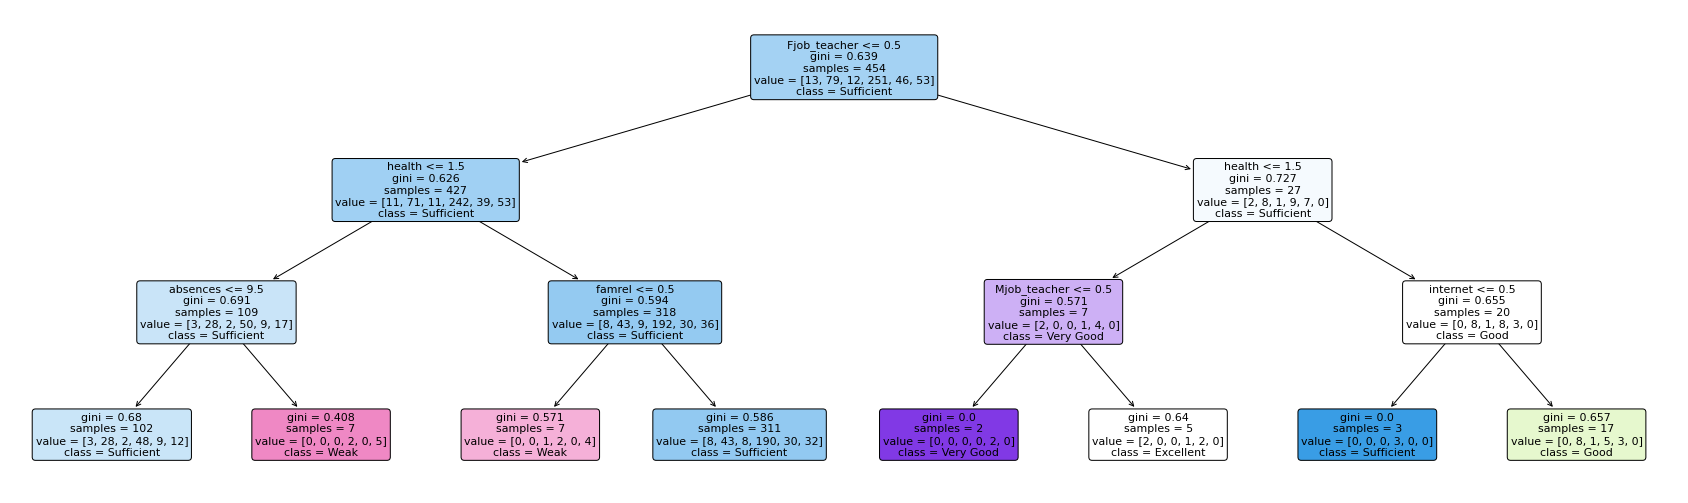

In [ ]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
# Configure the size of image for the tree
plt.figure(figsize = [30.0,9.0])

plot_tree(class_tree,
          feature_names = X.columns,
          filled = True,
          proportion = False,
          precision = 3,
          rounded = True,
          fontsize = 11,
          class_names = class_tree.classes_)

plt.show()

The full list of parameters for the plot_tree method can be found in its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Some important points about the information displayed above:

- The value of the highest count determines the class displayed in nodes/leaves. 

- To know which class is associated with each number in the value array, we can use the classes_ attribute of the decision tree classifier. In other words, we can use:


In [ ]:
print(class_tree.classes_)

['Excellent' 'Good' 'Poor' 'Sufficient' 'Very Good' 'Weak']


- The precision parameter sets the decimal numbers for the gini impurity value.

- The proportion parameter transforms the value of the samples into percentages if its value is True.

- The filled parameter associates a specific color to each class. The dominant class in a node/leaf sets the color for the node/leaf. The intensity of the colors depends on the proportion of the values of the dominant class. For example, the 'Sufficient' class has the color blue associated with it. As the proportion of blue values increases in a split, the node color becomes more intense.

At every step, sklearn calculates the chosen criterion (in our case the Gini impurity) for **all** features before splitting the data and repeats this process for every node. Now that we know how much work goes into one split, we can really appreciate what sci-kit-learn is doing behind the scenes.

# Regression tree with sci-kit-learn

Creating a decision tree for a regression tree is very similar. We only need to change the names of the dataframes and the target column. The steps to follow are the same as for a regression tree.

In [ ]:
# Separate features from target
X = grades.drop('G3',axis = 1)
y = grades['G3']

The second step is to split the data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X,y, test_size=0.3, shuffle = True, random_state = 34)

Next, we instantiate a regression tree, build it by fitting the training set, and make predictions using the test set.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Instantiate a regression tree
regression_tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 3, random_state = 34)

# Fit the data with the regressor
regression_tree.fit(X_train_reg,y_train_reg)

# Make predictions with the model
predictions_regression = regression_tree.predict(X_test_reg)

To have an idea of how well the model performed, let's compare the first few predictions with the true labels.

In [ ]:
# Create a dataframe with the predicted labels and true labels
comparison_regressor = pd.DataFrame(data = {'y_test': y_test_reg, 'y_pred' : predictions_regression})

comparison_regressor.sample(10, random_state = 24)

,y_test,y_pred
493,10,11.049020
491,9,12.397661
482,9,11.049020
64,12,12.397661
81,9,11.462185
501,13,11.462185
557,10,12.397661
503,14,12.397661
606,18,12.235294
244,12,12.397661


Later, we will learn the criteria to check if a model did well enough. For now, we will focus on how to visualize the tree we just created.

# Visualizing a regression decision tree

We will use sklearn and matplotlib to visualize the tree we build.

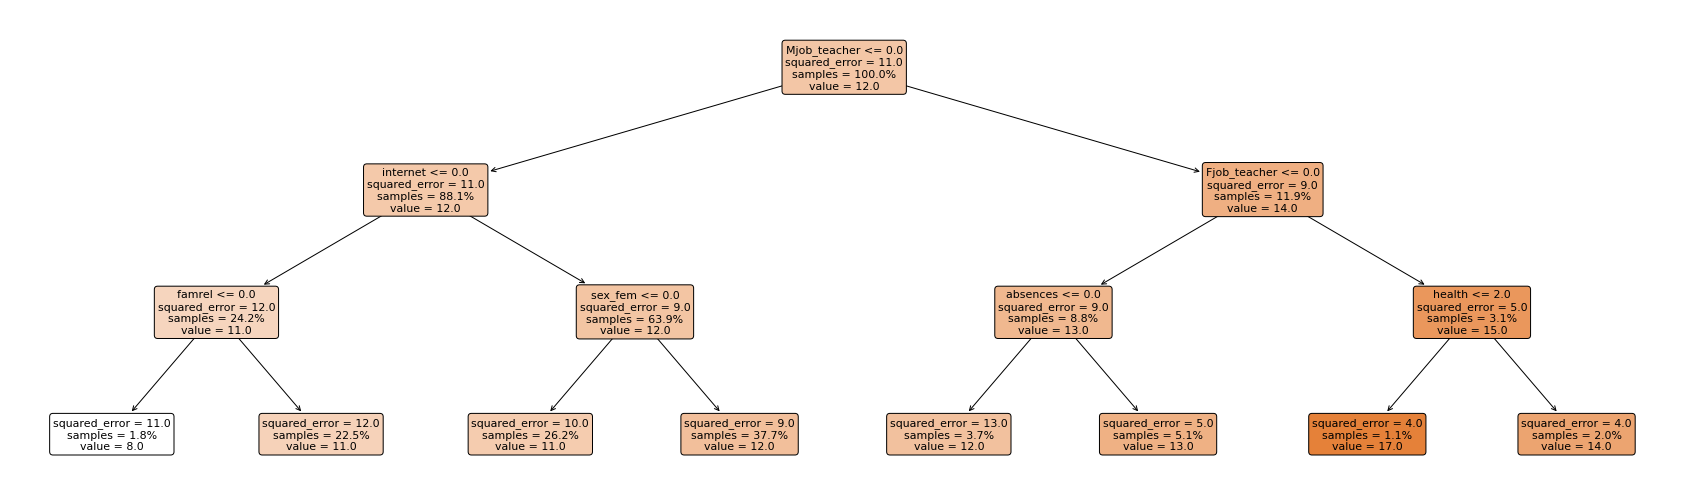

In [ ]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
# Configure the size of image for the tree
plt.figure(figsize = [30.0,9.0])

plot_tree(regression_tree,
          feature_names = X.columns,
          filled = True,
          proportion = True,
          precision = 0,
          rounded = True,
          fontsize = 11
          #class_names = class_tree.classes_
          )

plt.show()

The full list of parameters for the plot_tree method can be found in its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Some important points about the information displayed above:

- The last two parameters are for aesthetics. The rounded parameters display the boxes with rounded corners, while fontsize controls the text size inside the boxes.

- The precision parameter sets the decimal numbers for all values displayed at the node/leaf. Since the target variable includes only integers, we set this parameter to 0.

- The proportion parameter was evaluated to True. That changed the samples' result in the nodes/leaves to a percentage rather than a number.

- The filled parameter fills the nodes/leaves with a color ranging from white to pure orange. The smallest value of the target variable is associated with the white color, while the highest value is with pure orange. The values in between will have intermediate shades.

# Export trees

Before closing this lesson, let's show how we can export the tree in a text report. Sci-kit-learn has a library for that. Let's pratice with it.


In [ ]:
from sklearn.tree import export_text

export_tree = export_text(class_tree,
                          feature_names=list(X.columns))

In [ ]:
print(export_tree)

|--- Fjob_teacher <= 0.50
|   |--- health <= 1.50
|   |   |--- absences <= 9.50
|   |   |   |--- class: Sufficient
|   |   |--- absences >  9.50
|   |   |   |--- class: Weak
|   |--- health >  1.50
|   |   |--- famrel <= 0.50
|   |   |   |--- class: Weak
|   |   |--- famrel >  0.50
|   |   |   |--- class: Sufficient
|--- Fjob_teacher >  0.50
|   |--- health <= 1.50
|   |   |--- Mjob_teacher <= 0.50
|   |   |   |--- class: Very Good
|   |   |--- Mjob_teacher >  0.50
|   |   |   |--- class: Excellent
|   |--- health >  1.50
|   |   |--- internet <= 0.50
|   |   |   |--- class: Sufficient
|   |   |--- internet >  0.50
|   |   |   |--- class: Good



And there we have it. The vertical lines represent the splits. The horizontal lines connect the splits with the corresponding thresholds.

For a regression tree the structure is the same, but instead of classes we would have numbers. Let's visualize it.

In [ ]:
export_tree_regression = export_text(regression_tree,
                            feature_names=list(X.columns))

In [ ]:
print(export_tree_regression)

|--- Mjob_teacher <= 0.50
|   |--- internet <= 0.50
|   |   |--- famrel <= 0.50
|   |   |   |--- value: [7.88]
|   |   |--- famrel >  0.50
|   |   |   |--- value: [11.05]
|   |--- internet >  0.50
|   |   |--- sex_fem <= 0.50
|   |   |   |--- value: [11.46]
|   |   |--- sex_fem >  0.50
|   |   |   |--- value: [12.40]
|--- Mjob_teacher >  0.50
|   |--- Fjob_teacher <= 0.50
|   |   |--- absences <= 0.50
|   |   |   |--- value: [12.24]
|   |   |--- absences >  0.50
|   |   |   |--- value: [13.43]
|   |--- Fjob_teacher >  0.50
|   |   |--- health <= 1.50
|   |   |   |--- value: [16.80]
|   |   |--- health >  1.50
|   |   |   |--- value: [14.33]



# Decision trees: Metrics

So far, we prepared data for machine learning and used it to build a regression and a classification decision tree model. However, we did not introduce a way to measure how bad the model is at predicting new outcomes. Our next goal is to introduce the most popular metrics to evaluate decision tree model performance for regression and classification problems.

# Regression trees: Root mean squared error metric

We will start with the most popular metric for regression trees, known as root mean squared error (RMSE). It is defined as:
$$
\text{RMSE} = \sqrt{\frac{1}{n}\sum^{n}_{i=1} (\text{y_pred}_{i} - \text{y_outcome}_i)^2} 
$$
where $\text{y_pred}_i$ and $\text{y_outcome}_i$ are, respectively, the prediction value and the true outcome for the observation $i$ and $n$ are the total number of observations in the dataset.

Once more, sci-kit-learn makes it easy to compute this metric. Let's use it to check how bad was the regression tree we built.

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_reg, 
                   predictions_regression,
                   squared = False)

print(rmse)

3.131857054176334


That's it! Quickly done by sci-kit-learn. 

The RMSE is an error and a good model will evaluate it closer to zero. However, we need to keep in mind that the RMSE depends on the observed values of the target variable. If it contains larger values, like the distance between galaxies, the error will be large. If the values are smaller, like the distance between cells in the body, the error will be small. So it is crucial to know the context to interpret the values for this metric correctly.

# Regression trees: $R^2$ metric 

The second most popular metric for regression problems is the $R^2$, also known as the **coefficient of determination**. It represents the proportion of variance in the predictions that can be identified by the model. It is easier to understand this last sentence if we see the mathematical definition:
$$
R^2 = 1 - \frac{RSS}{TSS},
$$
where,
$$
RSS = \sum^{n}_{i=1} (\text{y_pred}_{i} - \text{y_outcome}_i)^2,
$$
is the residual sum of squares and computes the variance present in the predictions, while,
$$
TSS = \sum^{n}_{i=1} (\text{y_outcome}_{i} - \bar{y}_i)^2,
$$
is the sum of total squares and computes and computes the variance of the observed values around their mean. Here, $\bar{y}_i$ is the mean value for the target outcomes.

Some properties of the $R^2$ metric are:

- It is only equal to 1 if $RSS = 0$. That means that the model predicted all results correctly. In other words, the model accounts for 100% of the variance present in the target variable.

- The maximum value for $R^2$ is 1. 

- Contrary to the RMSE, it does not depend on the observed values of the target variable. This is an advantage over the RMSE.

- $R^2$ can be negative. It happens if the predictions made by the model are too far off.

$R^2$ is the default metric for a decision tree regressor in sci-kit-learn. It is, therefore, very easy to compute its value. Let's do it below,



In [ ]:
# Compute R^2 score for regression tree
r2 = regression_tree.score(X_test_reg,y_test_reg)
print(r2) 

0.002531851241002081


In [ ]:
print(f'The model accounts for {r2*100:.2f}% of the variance present in the test set.')

The model accounts for 0.25% of the variance present in the test set.


The decision tree we built is not doing well. That was expected since the tree had only 3 levels in order to make it easy to visualize and learn more about its items using sci-kit-learn. 

# Classification trees: accuracy and other

For classification problems, the most popular metrics for a binary outcome are accuracy, precision, recall, NPV, specificity, and F1-score We covered all of them in detail in a [previous lesson](https://colab.research.google.com/drive/1i7Y8YV_nQxqVEsoBVU7hI219bE2-I3wB). You are welcome to take a look there if these concepts are not familiar to you. Here, we will focus on using sci-kit-learn to compute the values for these metrics using the decision tree we just built.

## Accuracy

The accuracy is more general than the other metrics mentioned above and can be used to compute the score for a multi-class classification problem. It is the default metric for decision tree classifiers, so it is also very easy to compute it with sci-kit-learn:

In [ ]:
# Compute accuracy for the regression tree
accuracy = class_tree.score(X_test,y_test)

In [ ]:
print(f'The accuracy for the classification tree was {accuracy*100:.2f}%.')

The accuracy for the classification tree was 54.87%.


## Other metrics

Some important [metrics in binary classification problems](https://colab.research.google.com/drive/1i7Y8YV_nQxqVEsoBVU7hI219bE2-I3wB) are the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), NPV and specificity. However, we have multi-class values for the outcomes, so these metrics do not make sense here. There is a way we can transform multilabel classes into many binary classes. Sci-kit-learn has the [multilabel_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html) method that is handy here. Let's practice with it:

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(y_test, predictions, 
                                  labels = ['Poor', 'Weak','Sufficient', 'Good',  'Very Good','Excellent' ]))

[[[191   0]
  [  4   0]]

 [[157   7]
  [ 27   4]]

 [[ 14  77]
  [  3 101]]

 [[159   3]
  [ 32   1]]

 [[175   1]
  [ 18   1]]

 [[191   0]
  [  4   0]]]


According to the documentation, each 2x2 matrix is organized as,
$$
[[\text{True negatives}  , \space \text{False positives}], \\
  [\text{False negatives} , \space \text{True positives}]
  ].
$$
For example, the first 2x2 matrix, related to the 'Poor' label, has 191 true negatives (results as y_outcome = 'Excellent' and y_pred = 'Excellent', or y_outcome = 'Weak' and y_pred = 'Weak'), 0 false positives (results as y_outcome = 'Weak' and y_pred = 'Poor', or y_outcome = 'Excellent' and y_pred = 'Poor'), 4 false negatives (results as y_outcome = 'Poor' and y_pred = 'Weak', or y_outcome = 'Poor' and y_pred = 'Sufficient') and 0 true positives (results as y_outcome = 'Poor' and y_pred = 'Poor').

With this confusion matrix, one could compute the Precision, Recall, F1-score, NPV, and specificity for each label class. However, sci-kit-learn provides a tool to automate these calculations. It is called, the [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Let's compute the precision, recall, and F1-score for the classification tree we built using the classification report. 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, zero_division = 0))

              precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00         4
        Good       0.25      0.03      0.05        33
        Poor       0.00      0.00      0.00         4
  Sufficient       0.57      0.97      0.72       104
   Very Good       0.50      0.05      0.10        19
        Weak       0.36      0.13      0.19        31

    accuracy                           0.55       195
   macro avg       0.28      0.20      0.18       195
weighted avg       0.45      0.55      0.43       195



We have a report for each class, containing the precision, recall, and F1-score. Let's make clear what the other items in this report mean:

- The support column counts the observations at y_outcome with that label (the lowest three values of this column show the total number of observations).

- The macro avg (macro average) calculates the average for a given metric. For example, in the first column, if we sum the precision values for all labels and divide by the number of distinct labels, we will obtain the macro avg value of 0.28.

- The weighted avg computes the weighted average of a given column. It uses the support value divided by the total value of observations as the weight and multiplies it by the metric value for that specific label. This step is repeated for all labels, and the values obtained are added and divided by the total number of labels to get the weighted average.

Note that these methods are not specific to decision trees and can be applied to many other types of models for classification problems.

# Overfitting and the pruning mitigation

Previously, we built regression and classification trees using the max_depth=3 parameter. It helped us to visualize our tree, but it also performed what is called **pruning**. If we don't set any value to this parameter, the tree will grow until it groups all information in homogeneous groups. Although that might look good at first, it is overfitting the training data. It becomes very good at predicting values on the training set but fails badly on the test set. Let's check this by building a classification tree without setting the max_depth parameter to any value and compute the score on the training and test sets.

In [ ]:
# Instantiate a classification tree
class_tree_free = DecisionTreeClassifier(random_state = 34)

# Fit the data with the classifier
class_tree_free.fit(X_train,y_train)

# Compute accuracy for the regression tree on the training set
accuracy_train_free = class_tree_free.score(X_train,y_train)

# Compute accuracy for the regression tree on the test set
accuracy_test_free = class_tree_free.score(X_test,y_test)

In [ ]:
print(f'The accuracy for the tree without pruning, on the train set, was {accuracy_train_free*100:.2f}%.')
print(f'The accuracy for the tree without pruning, on the test set, was {accuracy_test_free*100:.2f}%.')

The accuracy for the tree without pruning, on the train set, was 96.70%.
The accuracy for the tree without pruning, on the test set, was 41.54%.


As we pointed out, the tree did very well on the training set but underperformed on the test set. Let's visualize how this tree looks.

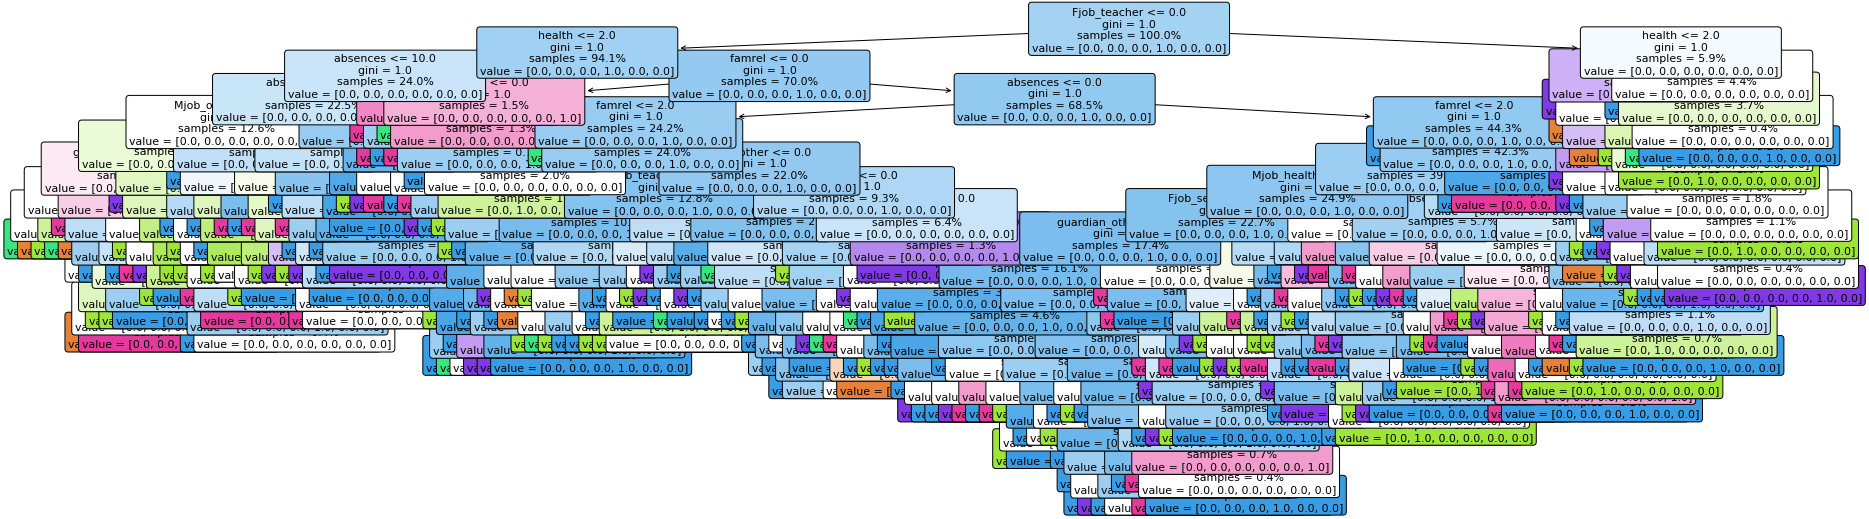

In [ ]:
# Configure the size of image for the tree
plt.figure(figsize = [30.0,9.0])

plot_tree(class_tree_free,
          feature_names = X.columns,
          filled = True,
          proportion = True,
          precision = 0,
          rounded = True,
          fontsize = 11
          #class_names = class_tree.classes_
          )

plt.show()

If you run the line of code above, you will notice that it takes a while to obtain this messy tree. As we saw in the previous lessons, the number of computations to find an optimal threshold at every node in a decision tree can be overwhelming. In a large dataset, we are guaranteed to spend a large amount of time waiting if we do not perform any pruning. Pruning solves two problems at once; it mitigates the overfitting of the data and reduces the computational time needed.

Let's prune the above tree introducing the max_depth = 5 parameter, and check if the accuracy on the test set improves.

In [ ]:
# Instantiate a classification tree
class_tree_pruned = DecisionTreeClassifier(max_depth = 5, random_state = 34)

# Fit the data with the classifier
class_tree_pruned.fit(X_train,y_train)

# Compute accuracy for the regression tree on the training set
accuracy_train_pruned = class_tree_pruned.score(X_train,y_train)

# Compute accuracy for the regression tree on the test set
accuracy_test_pruned = class_tree_pruned.score(X_test,y_test)

In [ ]:
print(f'The accuracy for the pruned tree, on the train set, was {accuracy_train_pruned*100:.2f}%.')
print(f'The accuracy for the pruned tree, on the test set, was {accuracy_test_pruned*100:.2f}%.')

Note that tree did worse on the training set but improved on the test set. The computational time also decreased. Let's visualize the pruned tree before moving on to the next section.

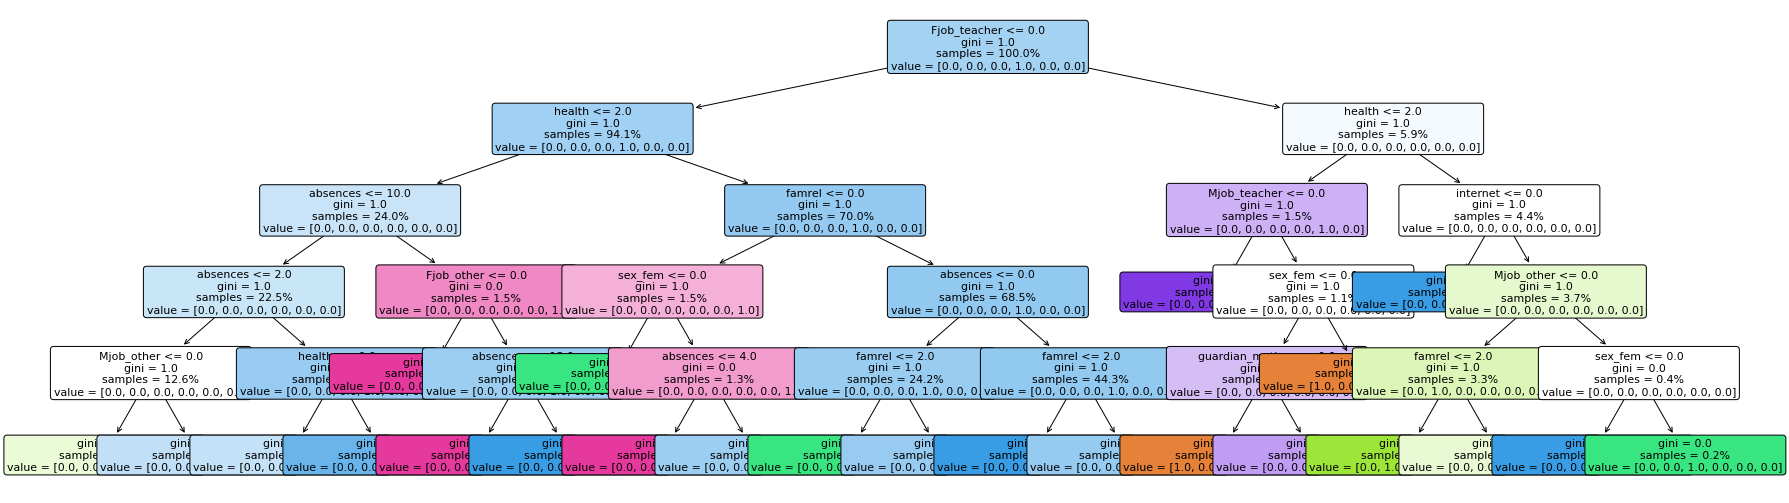

In [ ]:
# Configure the size of image for the tree
plt.figure(figsize = [30.0,9.0])

plot_tree(class_tree_pruned,
          feature_names = X.columns,
          filled = True,
          proportion = True,
          precision = 0,
          rounded = True,
          fontsize = 11
          #class_names = class_tree.classes_
          )

plt.show()

As we can see, many branches were cut, which justifies the pruning nomenclature.

# Importance of the features

There are many other ways one can perform to improve the performance of a decision tree. The feature_importances_ attribute for regression and classification trees provides an array of normalized values measuring how much each feature contributes to reducing the value of the criterion metric. With this information, we can choose which columns the model should select instead of feeding it with irrelevant information.

Let's check it with the pruned tree we created above.

In [ ]:
class_tree_pruned.feature_importances_

array([0.28100371, 0.18894673, 0.07878569, 0.04996041, 0.        ,
       0.16459331, 0.        , 0.06858266, 0.        , 0.02077864,
       0.        , 0.03957837, 0.        , 0.0774683 , 0.03030219,
       0.        ])

The order of this array matches the order of the column names provided by the feature_names_in_ attribute:



In [ ]:
class_tree_pruned.feature_names_in_

array(['absences', 'health', 'sex_fem', 'internet', 'Pstatus_together',
       'famrel', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'guardian_mother', 'guardian_other'], dtype=object)

As we can see, it is not easy to visualize what is happening. Let's build a bar graph to help us visualize it.

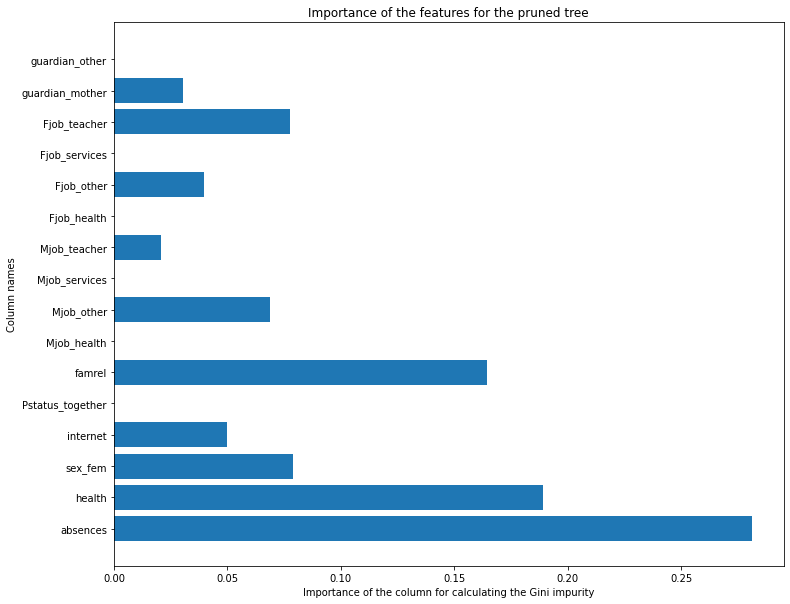

In [ ]:
plt.rcParams['figure.figsize'] = [12.0,10.0]

plt.barh(class_tree_pruned.feature_names_in_,
         class_tree_pruned.feature_importances_)

plt.xlabel('Importance of the column for calculating the Gini impurity')
plt.ylabel('Column names')
plt.title("Importance of the features for the pruned tree")
plt.show()

Five columns are not contributing to the confection of the tree. We could drop them from the dataset, and the next time we run the tree calculation, it would save some computation time to build the tree. It is not very relevant here because of the size of the dataset, but it is something to keep in mind when dealing with large amounts of data.

# Optimizing tree parameters

Let's break down some of the steps one can optimize when building a machine learning model:

1 - One could experiment with the test_size parameter of the train_test_split function used to divide the dataset into train and test sets. Different values will return different scores. 

2 - If some of the features of the dataset are unbalanced, one can use the stratify parameter to keep the proportions when defining the training and test sets. 

These two steps are applicable to any machine learning model. When building decision trees, one can experiment with all the hyperparameters and search for the best model. Here are some important parameters we should be aware of:

- max_depth: We already mentioned and showed how it works above. It establishes how many levels the tree will have.

- criterion: We already introduced four of the criteria used when building a decision tree. However, more options are available in the documentation.

We can also control how the splits are made at the nodes using the following parameters:

- min_samples_split: An internal node will be split only if the minimum number of observations in the node is equal to the value of this parameter. The algorithm stops if this criterion is not met, and it returns an impure leaf.

- max_features: It states how many columns the algorithm should consider when searching for the optimal threshold.

- min_impurity_decrease: A split will occur in an internal node only if the reduction of the weighted gini impurity is equal to or greater than this value.

We can also control the leaves' properties with the parameters below:

- min_sample_leaf: It controls the minimum number of observations required for a leaf node. It helps to avoid overfitting by prohibiting leaf nodes with just a few observations.

- max_leaf_nodes: The maximum number of leaf nodes a tree can have. It also helps to avoid overfitting.

- min_weight_fraction_leaf: This is related to an advanced technique. When fitting the data, we can attribute weights to the observations. In this case, we can choose to have a minimum weight fraction of the total sum of weights at a leaf node.

In addition, the DecisionTreeClassifier has the following parameter:

- class_weight: When the values for the target variable are unbalanced, setting this parameter to 'balanced' will assign weights to each observation and turn it into a balanced distribution.

# Minimal Cost-Complexity Pruning

The last parameter we will mention in this lesson is the ccp_alpha. It sets a penalty for trees that generated a lot of leaves. It is a way to penalize trees that overfit.

The ccp_alpha parameter is part of the Minimal Cost-Complexity Pruning optimization technique. It considers many subtrees and computes the impurity (the rate of misclassified values) of all leaves. The penalty comes by adding to this impurity the number of leaves times the ccp_alpha parameter. Subtrees with a small impurity but a high number of leaves will then be penalized.

Mathematically it is written as:
$$
\text{Subtree}_n = \sum \text{Impurity of all leaves} + (\text{ccp_alpha} \times \text{# of leaves}).
$$

Let's practice how we can implement the ccp_alpha penalty in a decision tree. For that we will use the decision tree with no pruning we built earlier on. The challenge is to find the optimal value for alpha. Sci-kit-learn provides the [cost_complexity_pruning_path()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) function to which we can fit into the training set and obtain an array of optimal values for alpha.

In [54]:
  # Get an array with optimal values for alpha
  cost_path = class_tree_free.cost_complexity_pruning_path(X_train,y_train)

  print(cost_path.ccp_alphas)

[0.         0.00029369 0.0003776  0.00055066 0.00066429 0.00073421
 0.00073421 0.00073421 0.00073421 0.00073421 0.00084609 0.00110132
 0.00117474 0.00117474 0.00134606 0.00137665 0.00146843 0.00146843
 0.00146843 0.00146843 0.00146843 0.00146843 0.00146843 0.00146843
 0.00146843 0.00146843 0.00146843 0.00151738 0.00154185 0.00157332
 0.00165198 0.00165198 0.00165198 0.00169092 0.00173065 0.00177435
 0.00177435 0.00188798 0.00188798 0.00188798 0.00192731 0.00195791
 0.00196665 0.0019757  0.00201909 0.00203321 0.00204531 0.0020558
 0.00207153 0.00211087 0.00211561 0.00213971 0.00220264 0.00220264
 0.00220264 0.00220264 0.00220264 0.00220264 0.00220264 0.00220264
 0.00220264 0.00220264 0.00220264 0.00220264 0.00220264 0.00220264
 0.00227606 0.00229005 0.00234949 0.00237412 0.00241565 0.00242291
 0.00244015 0.0024445  0.00249633 0.00256975 0.00256975 0.00262219
 0.0027061  0.00272708 0.00276904 0.00279001 0.00281583 0.00283197
 0.00283197 0.00287067 0.00293686 0.00293686 0.00293686 0.00293

Now we have to train the subtrees for each of these alpha values.

In [55]:
subtrees = []

# Building a classifier for each value of alpha
for alpha in cost_path.ccp_alphas:
  subtree = DecisionTreeClassifier(random_state= 34, ccp_alpha=alpha)

  subtree.fit(X_train,y_train)
  subtrees.append(subtree)

We will have a long list of subtrees. Let's slice it in a way that is easier to change if we decide to test for other values later on.
Now we have to train the subtrees for each of these alpha values.

In [65]:
# Select just a subset of the subtrees set
ccp_alpha_slice = cost_path.ccp_alphas[-10:-1]
subtree_slice = subtrees[-10:-1]

We are ready to compute the score for each subtree. Let's do that and store the values in an array.

In [66]:
# Compute the score for each subtree in the subtree slice we created above
subtree_scores = [subtree.score(X_train,y_train) for subtree in subtree_slice]

Let's visualize our results in a line plot.

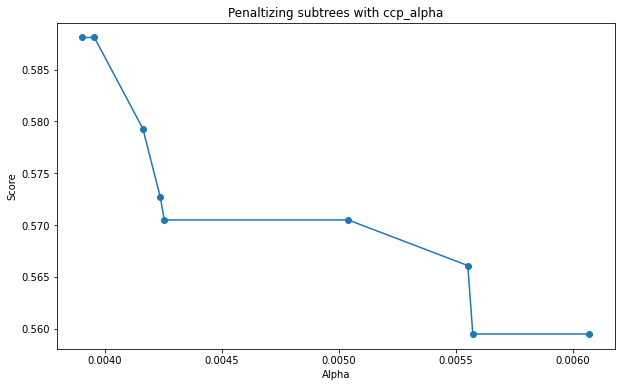

In [67]:
plt.rcParams["figure.figsize"] = [10.0, 6.0]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Score")
ax.set_title("Penaltizing subtrees with ccp_alpha")
ax.plot(ccp_alpha_slice, subtree_scores, marker="o")
plt.show()

We see that the best score is provided by the model with an alpha value around 0.0040. Let's check the precise value for alpha:

In [69]:
# Get maximum value for alpha and the associated score
alpha_scores = tuple(zip(ccp_alpha_slice,subtree_scores))
print(max(alpha_scores, key = lambda x: x[1]))

(0.0039032132676859272, 0.5881057268722467)


The best model in the slice for the subtrees we considered had an accuracy of 58.81% and an alpha value of 0.0039. 

# Summary

In this lesson, we learned:

- How to prepare ordinal and non-ordinal data for machine learning.

- How to build a regression and classification decision tree with sci-kit-learn.

- How to visualize and export a decision tree with matplotlib and sci-kit-learn.

- Some metrics used to evaluate a decision tree performance.

- How pruning mitigates overfitting and reduces the computation time.

- Some of the parameters and tools to mitigate overfitting and improve the efficiency of the decision trees.